En el presente trabajo práctico se analizarán diversos aspectos termodinámicos y estructurales de oligonucleótidos de ADN, su equilibrio de hibridación y las bases químicas de reconocimiento específico de proteínas.

# 1) Construir un camino de reacción posible para la reacción de hibridación mediante simulaciones estocásticas.

Para analizar la hibridación de oligonucleótidos cortos vamos a hacer una simulación de esta reacción química por medio de simulaciones estocásticas. 

En una simulación estocástica se modela la evolución de variables aleatorias, es decir, variables que pueden tomar distintos valores al azar con cierta probabilidad. 
En cualquier reacción química el número de moléculas de sustratos y productos son variables aleatorias que van tomando distintos valores a medida que la reacción ocurre. 
Para hacer la simulación vamos a usar el algoritmo de Gillespie, que es muy eficiente. 

Primero vamos a definir las probabilidades de las reacciones que pueden ocurrir en el sistema: 

Asumimos que el proceso es de dos estados: las hebras pueden estar simples o dobles

### $\hspace{6cm}$A + B $\underset{k_2}{\stackrel{k_1}{\rightleftharpoons}}$  AB $\hspace{4cm}$  K$_{D} = \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}} = \frac{k_{2}}{k_{1}}$


A y B son las hebras simples complementarias y AB es el oligonucleótido de doble cadena o dúplex. El subíndice "eq" indica que son concentraciones de equilibrio.

Son dos las reacciones que pueden ocurrir:

### 1) $\hspace{3cm} $ A + B $ \xrightarrow[]{k1}$ AB
### 2) $\hspace{3cm} $ AB $ \xrightarrow[]{k2}$ A + B

La probabilidad de que ocurra la formación de un duplex (1) o su disociación (2) va a depender de las velocidades de esas reacciones (cantidad de transformaciones de un dado tipo por unidad de tiempo).

Para la reacción química planteada arriba:

a) ¿Cuáles son las velocidades de formación de duplex y de disociación del dúplex (v2)?

b) ¿Cuál será la velocidad de reacción global, vtot? 

Si conocemos el número de reacciones de fomación de duplex y de disociación de duplex, por unidad de tiempo, ¿podemos encontrar la probabilidad que tiene asociada cada una de esas transformaciones?

c) ¿Se pueden escribir esas probabilidades en función de K$_{D}$.

¿Llegaron a expresiones similares a estas?

### $\hspace{3cm}$P$_{disociación}$ = $ \frac{1}{1+\frac{[A][B]}{[AB]}\frac{1}{K_{D}}}$ $\hspace{3cm}$ P$_{formación-duplex}$ = $ \frac{1}{1+\frac{[AB]}{[A][B]}K_{D}}$

d) La formación de duplex será mayor, menor, o igual a la de disociación en las siguientes situaciones?:
### * $ \frac{[A][B]}{[AB]}  = \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}} $
### * $ \frac{[A][B]}{[AB]} > \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}} $
### * $ \frac{[A][B]}{[AB]} < \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}} $


El programa que vamos a usar calcula las probabilidades que definimos recién. Luego actualiza el número de moléculas de A, B y AB. La repetición sucesiva de esos pasos (iteración) hace que las concentraciones de todas las especies evolucionen.

### Simulamos la reacción de hibridación
#### Tenemos que pasarle al programa: la secuencia de  nucleótidos, temperatura inicial, temperatura final, y el delta de temperatura (cada cuántos grados hacemos el cálculo en el intervalo)

e) Primero vamos a simular la reacción de hibridación para la secuencia 5'CGATATATCG3'3 a dos temperaturas: 330K y 340K.
El programa hace el cálculo solo para el punto inicial del intervalo (no el final), entonces vamos especificar:

- temperatura inicial = 330 
- temperatura final = 341 
- delta de temperaura = 10

In [ ]:
import matplotlib.pyplot as plt 

%run ./TP_ADN_gillespie.py 'CGATATATCG' 330 341 10 #secuencia t_ini t_fin delta_t

Los resultados de la simulación quedan guardados en la variable "data_temp". Para cada temperatura se guarda la lista de los valores:

- [x, y1, y2, y3 ] = tiempo, hebra A, hebra B, duplex AB

Por ejemplo podemos pedirle a data_temp las temperaturas que calculó:

In [ ]:
data_tiempo.keys()

O el tiempo o concentraciones para una temperatura particular:

In [ ]:
data_tiempo[330.0][:,0] # esta es la lista de tiempos a 330K

f) Vamos a graficar la evolución de la reacción, en función del tiempo, para las dos temperaturas. 

In [ ]:
def graficar(x1,x2, color, leyenda):    
    ax.set_xlabel('tiempo (s)')
    ax.set_ylabel('concentracion (M)')
    ax.plot(x1, x2, c=color, label=leyenda)

fig, ax = plt.subplots()
plt.title('Hibridación a 330K')

graficar(data_tiempo[330.0][:,0], data_tiempo[330.0][:,1], 'b', 'simple hebra A') 
graficar(data_tiempo[330.0][:,0], data_tiempo[330.0][:,3], 'r', 'doble hebra AB')

plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.title('Hibridación a 340K')

graficar(data_tiempo[340.0][:,0], data_tiempo[340.0][:,1], 'b', 'simple hebra A') 
graficar(data_tiempo[340.0][:,0], data_tiempo[340.0][:,3], 'r', 'doble hebra AB')

plt.legend()
plt.show()

# 2)Explorar la dependencia con la temperatura de la reacción de hibridación.

Ya sabemos simular la reacción química de hibridación. Las concentraciones de equilibrio de A, B y AB sólo dependen de K$_{D}$ (o lo que es equivalente de $\Delta$G$^o$). Ahora veremos cómo cambian esas concentraciones en función de la temperatura.
Vamos a calcular la reacción de hibridación entre 300K y 370K, a intervalos de 10K.

In [ ]:
%run ./TP_ADN_gillespie.py 'CGATATATCG' 300 370 10 #secuencia t_ini t_fin delta_t

Además de guardar las concentraciones ([A], [B], [AB]), en función del tiempo. También se guardan los promedios de las concentraciones a tiempos largos (en equilibrio), para cada temperatura. Por ejemplo, para T=340K, se promedian las concentraciones en la región sombreada rosa (el ultimo cuarto de tiempo). Esos valores se guardan en la variable: prom_temp. 

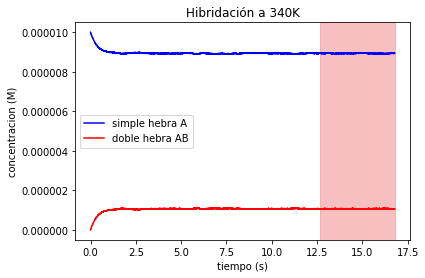

In [ ]:
prom_temp[:,0] # esta es la lista de las temperaturas

In [ ]:
prom_temp[:,3] # estos son las concentraciones a tiempos largos del duplex para cada temperatura

Vamos a graficar la fracción de hebras dobles en función de la temperatura y el $\Delta$G$^{o}$ en función de la temperatura. Se les ocurre cómo lo harían en un experimento si hubieran medido las concentraciones de equilibrio de [A], [B], y [AB] a distintas temperaturas?

In [ ]:
def graficar(x1,x2, color, ejey):    
    ax.set_xlabel('Temperatura (K)')
    ax.set_ylabel(ejey)
    plt.scatter(x1, x2, c=color)
    ax.plot(x1, x2, c=color)

temp, A, B, AB = prom_temp[:,0], prom_temp[:,1], prom_temp[:,2], prom_temp[:,3]

kduplex = (2*AB)/(A+B+2*AB) #fracción de moléculas como duplex

def logx(x):
    return math.log(x)

dg = 0.0083 * temp * np.array( [ logx(x) for x in (AB/(A*B)) ] ) # delta G


fig, ax = plt.subplots()
plt.title('Fracción doble hebra vs Temperatura')
graficar(temp, kduplex, 'b', 'Fracción doble hebra') 
plt.show()

fig, ax = plt.subplots()
plt.title('$\Delta$G$^{o}$ vs Temperatura')
graficar(temp, dg, 'r', '$\Delta$G$^{o}$ (KJ/mol*K) ')
plt.show()

- ¿A partir de la observación del primer gráfico cuál será la Tm para esta secuencia?

Vamos a analizar los parámetros termodinámicos de la desnaturalización: 
- ¿Pueden expresar la relación entre $\Delta$G$^o$, $\Delta$H$^o$ y $\Delta$S$^o$? 
- ¿Entonces, a partir del segundo gráfico podrían estimar $\Delta$H$^o$ y $\Delta$S$^o$?. ¿Cómo? 
- ¿$\Delta$H$^o$ y $\Delta$S$^o$ son positivos o negativos para la desnaturalización de los oligonucleótidos?.
- ¿Cómo dependerá la Tm de la magnitud de $\Delta$H$^o$ y $\Delta$S$^o$ entre distintas secuencias primarias de oligonucleótidos?.

  Recordatorio: $\Delta$H$^{o}$ puede calcularse también usando la ecuación que ya conocen del TP 2 (ec. 2) que aplicada a este sistema es:	
## $ \frac{d ln(K_{d})}{\frac{1}{T}}  = \frac{{\Delta}H^{o}}{R}$ 
En los experimentos de PCR, después de los ciclos de amplificación, se hacen curvas de desnaturalización para separar los fragmentos doble hebra antes de recomenzar otro ciclo de amplificación. La reacción se sigue por la fluorescencia de sondas que solo emiten cuando se intercalan en el duplex. Este es el resultado de una de esas curvas (para un segmento de unas 180pb). Es muy similar a lo que simulamos hasta ahora:

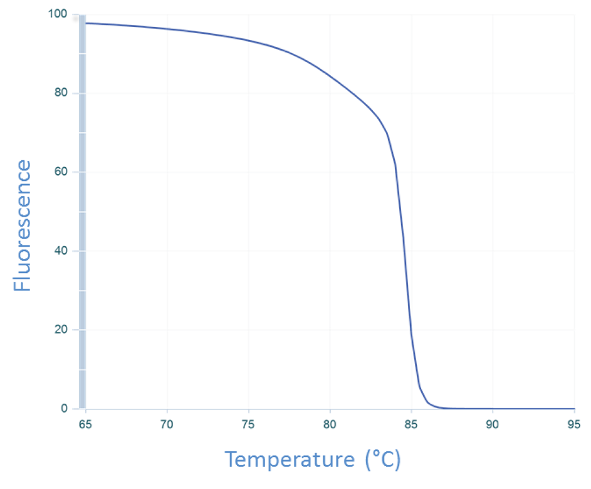

# 3) Estudiar la dependencia de la Tm con la composición y la secuencia de bases A, T, C, G.

Ahora comprendimos que las curvas de desnaturalización como las anteriores surgen de:
- un comportamiento tipo dos estados (1) y 
- valores de $\Delta$H$^{o}$ y $\Delta$S$^{o}$ positivos (2).

Las curvas de desnaturalización de secuencias cortas de oligonucleóticos suelen tener este comportamiento, pero para otros sistemas puede no ser así. Esta, por ejemplo es la curva de desnaturalización de segmentos de ADN amplificados por PCR (de unas 200 pb). ¿Qué podría estar ocurriendo? 

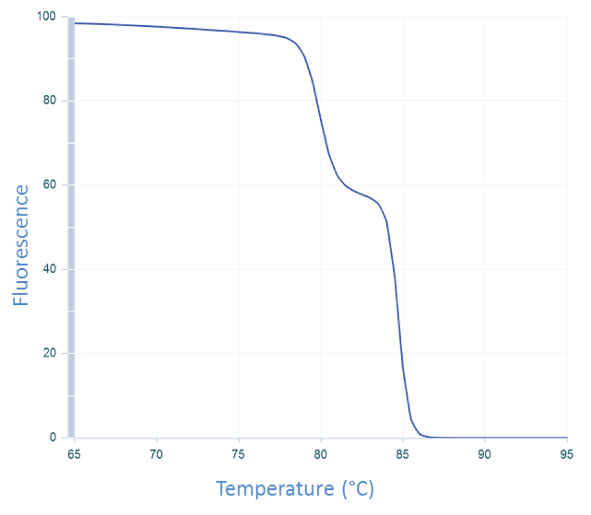

Ahora vamos a analizar cómo varían $\Delta$H$^{o}$ y $\Delta$S$^{o}$, y por lo tanto la Tm, en función de la secuencia primaria de bases. 

Nuestro programa estima el delta H y delta S para una secuencia de oligonucleótidos dada, en base a un modelo termodinámico conocido como de “vecinos más cercanos". Este modelo está muy generalizado para describir la termodinámica del ADN. Predice adecuadamente la Tm de secuencias de oligonucleótidos de hasta unas 20 pares de bases. Se usa en varios predictores de Tm para el análisis y diseño de oligonucleótidos para PCR. Por ejemplo: https://www.vitascientific.com/information/calculator , https://www.exiqon.com/ls/Pages/ExiqonTMPredictionTool.aspx , http://biotools.nubic.northwestern.edu/OligoCalc.html, http://arep.med.harvard.edu/kzhang/cgi-bin/myOligoTm.cgi , https://www.dna.utah.edu/tm/ ... y otros.

En este modelo la estabilidad del dúplex se calcula como la suma de las contribuciones de cada par de bases vecinas. 
Por ejemplo, para calcular los parámetros termodinámicos del oligonucleótido 5'CGTTGA3' (3'GCAACT5'), se suman las contribuciones a $\Delta$H$^{o}$ y $\Delta$S$^{o}$ de (CG/GC) + (GT/CA) + (TT/AA) + (TG/AC) + (GA/CT) + extremo CG + extremo AT. 

In [ ]:
print(nn_model.keys()) #lista de todas las secuencias posibles
print(nn_model['AT']) # DeltaH y DeltaS para la hibridación de AT
print(nn_model['CA']) # DeltaH y DeltaS para la hibridación de CA

In [ ]:
%run ./TP_ADN_gillespie.py 'CGATATATCG' 300 370 10
#guardo los resultados con "_a"
temp_a, A_a, B_a, AB_a = prom_temp[:,0], prom_temp[:,1], prom_temp[:,2], prom_temp[:,3]
kduplex_a = (2 * AB_a)/(A_a + B_a + 2 * AB_a)

%run ./TP_ADN_gillespie.py 'AAACCTTTGG' 300 370 10
#guardo los resultados con "_b"
temp_b, A_b, B_b, AB_b = prom_temp[:,0], prom_temp[:,1], prom_temp[:,2], prom_temp[:,3]
kduplex_b = (2 * AB_b)/(A_b + B_b + 2 * AB_b)

%run ./TP_ADN_gillespie.py 'CGCGCGCGCG' 300 400 10
#guardo los resultados con "_c"
temp_c, A_c, B_c, AB_c = prom_temp[:,0], prom_temp[:,1], prom_temp[:,2], prom_temp[:,3]
kduplex_c = (2 * AB_c)/(A_c + B_c + 2 * AB_c)

In [ ]:
def graficar(x1,x2, color, ejey):    
    ax.set_xlabel('Temperatura (K)')
    ax.set_ylabel('Fracción de doble Hebra')
    #ax.set.label(ejey)
    plt.scatter(x1, x2, c=color, label=ejey)
    ax.plot(x1, x2, c=color)

fig, ax = plt.subplots()
plt.title('Curvas de desnaturalización')
graficar(temp_a, kduplex_a, 'b', 'CGATATATCG') 
graficar(temp_b, kduplex_b, 'r', 'AAACCTTTGG')
graficar(temp_c, kduplex_c, 'g', 'CGCGCGCGCG')
plt.legend()
plt.show()

b) ¿Cómo varía la estabilidad con la proporción de CG? ¿La estabilidad depende sólo de la composición de nucleótidos?